Tugas image procesing1

Tawang sahro winanto

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


file gambar

+bila pas runing di bawah mendapatkan error (Cannot understand given URI: 14.) jalankan ulang code di bawah ini lalu run code yang tadi error
saya tidak tau kenapa colab mengalamin bug yang mematikan fungsi memangil gambar setelah di gunakan berapa kali



In [16]:
#gambar tugas latihan
a = ('/content/drive/MyDrive/SIB/image processing/tugas1/cebok.jpg')
b = ('/content/drive/MyDrive/SIB/image processing/tugas1/rontgen.jpg')
c = ('/content/drive/MyDrive/SIB/image processing/tugas1/rontgengelap.jpg')
d1= ('/content/drive/MyDrive/SIB/image processing/tugas1/ada1.jpg')
d2= ('/content/drive/MyDrive/SIB/image processing/tugas1/ada.jpg')

#gambar studi kasus 
ge1 = ('/content/drive/MyDrive/SIB/image processing/tugas1/gelap1.jpg')
ge2 = ('/content/drive/MyDrive/SIB/image processing/tugas1/gelap2.jpg')
cv1 = ('/content/drive/MyDrive/SIB/image processing/tugas1/cctv.jpg')
pa1 = ('/content/drive/MyDrive/SIB/image processing/tugas1/pantai1.jpg')
pa2 = ('/content/drive/MyDrive/SIB/image processing/tugas1/pantai2.jpg')  

Berikut link Drive untuk data gambar yang saya gunakan
https://drive.google.com/drive/folders/1TOxLyyZrP0OIMurT8i4WUrXNnQwNJ0g9?usp=sharing

A. Transformasi Geometri Pada Citra

1.Translasi

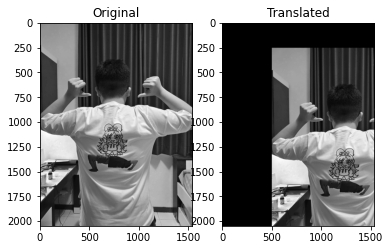

In [3]:
import numpy as np
def translate(img, x, y): 
  height, width = img.shape 
  res = np.zeros(img.shape)
  res[y:,x:] = img[:height-y,:width-x] 
  return res

from skimage import io, color
from matplotlib import pyplot as plt
i1 = color.rgb2gray(io.imread(a)) 
i2 = translate(i1,500,250) #awal (i1, 15,25)
plt.subplot(1,2,1); plt.imshow(i1,cmap='gray') 
plt.title('Original')
plt.subplot(1,2,2); plt.imshow(i2,cmap='gray') 
plt.title("Translated")
plt.show()



2. skala

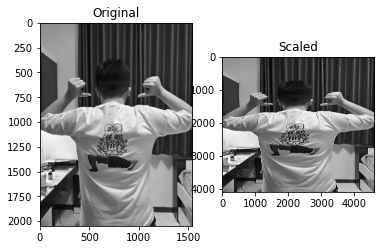

In [4]:
def perbesar(img, scX, scY): 
  width, height = img.shape 
  r = width * scX
  c = height * scY
  newImg = np.zeros((r,c)) 
  for i in range(0, r):
    for j in range(0, c):
      newImg[i][j] = img[i//scX][j//scY]
  return newImg

i2 = perbesar(i1, 2, 3) # awal (i1,1,2) saya ganti menjadi 2,3 yaitu lebar di perbesar 2x dan panjang di perbesar 3x
plt.subplot(1,2,1); plt.imshow(i1, cmap='gray') 
plt.title('Original')
plt.subplot(1,2,2); plt.imshow(i2, cmap='gray') 
plt.title("Scaled")
plt.show()


3.  Rotasi

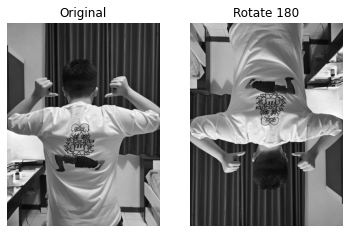

In [5]:
from skimage.transform import rotate
i1_rotate = rotate(i1, 90*2) # awal 90 derajat
plt.subplot(1,2,1); plt.imshow(i1, cmap='gray') 
plt.title('Original'); plt.axis("off") 
plt.subplot(1,2,2); plt.imshow(i1_rotate, cmap='gray') 
plt.title("Rotate 180"); plt.axis("off")
plt.show()

B. Image Enhancement (Spatial Domain)

1. Point Processing

    a. Image Negative

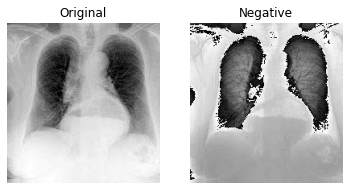

In [6]:
g1 = io.imread(b) 
g2 = 150-g1 # awal 255
plt.subplot(1,2,1); plt.imshow(g1) 
plt.title('Original'); plt.axis("off") 
plt.subplot(1,2,2); plt.imshow(g2) 
plt.title('Negative'); plt.axis("off") 
plt.show()


b. Log Transformation

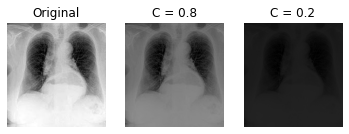

In [7]:
m = g1/255 
c1 = 0.8 #awal 0,5
c2 = 0.2 #awal 2
f1 = c1*np.log(1 + (m)) 
f2 = c2*np.log(1 + (m))

plt.subplot(1,3,1); plt.imshow(g1)
plt.title('Original'); plt.axis("off") 
plt.subplot(1,3,2); plt.imshow(f1) 
plt.title('C = 0.8'); plt.axis("off") 
plt.subplot(1,3,3); plt.imshow(f2) 
plt.title('C = 0.2'); plt.axis("off") 
plt.show()

c. Gamma (Power) Transformation

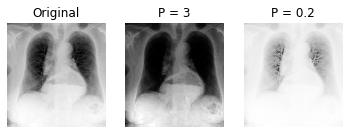

In [8]:
a = g1/255 
c = 1
p1 = 3 #awal 0.5
p2 = 0.2 #awawl 2
f1 = c*(a**p1) 
f2 = c*(a**p2)
plt.subplot(1,3,1); plt.imshow(g1) 
plt.title('Original'); plt.axis("off") 
plt.subplot(1,3,2); plt.imshow(f1) 
plt.title('P = 3'); plt.axis("off") 
plt.subplot(1,3,3); plt.imshow(f2) 
plt.title('P = 0.2'); plt.axis("off") 
plt.show()

d. Contrast Stretching

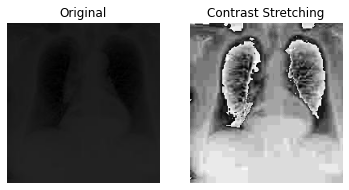

In [11]:
h3 = io.imread(c) 
mn = min(h3.flatten())
mx = max(h3.flatten())
b = int(np.floor(510 / (mx - mn))) # awal 255 -> 510
h3_cs = (h3 - mn) * b

plt.subplot(1,2,1); plt.imshow(h3) 
plt.title('Original'); plt.axis("off") 
plt.subplot(1,2,2); plt.imshow(h3_cs) 
plt.title('Contrast Stretching'); plt.axis("off") 
plt.show()

e. Image Histograms

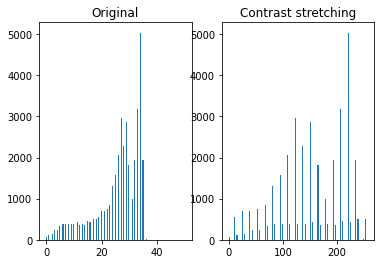

In [12]:
from skimage import util
gray = util.img_as_ubyte(color.rgb2gray(h3))
plt.subplot(1,2,1); plt.hist(gray.flatten(), 128, range=(0,50)) # awal 256, range=(0,256)
plt.title('Original')

gray2 = util.img_as_ubyte(color.rgb2gray(h3_cs)) 
plt.subplot(1,2,2); plt.hist(gray2.flatten(), 128, range=(0,256)) # awal 256, range=(0,256)
plt.title('Contrast stretching') 
plt.show()

f. Histogram Equalization

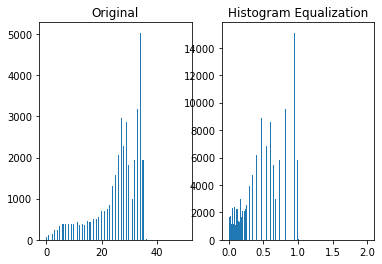

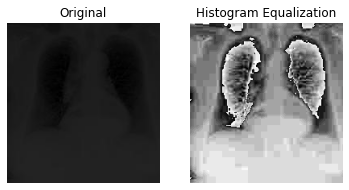

In [65]:
from skimage import util
from skimage import exposure

gray = util.img_as_ubyte(color.rgb2gray(h3))
plt.subplot(1,2,1); plt.hist(gray.flatten(), 128, range=(0,50))
plt.title('Original')

eq_i3 = exposure.equalize_hist(h3)
plt.subplot(1,2,2); plt.hist(eq_i3.flatten(), 128, range=(0,2))
plt.title('Histogram Equalization')
plt.show()

plt.subplot(1,2,1); plt.imshow(h3) 
plt.title('Original'); plt.axis("off") 
plt.subplot(1,2,2); plt.imshow(h3_cs)
plt.title('Histogram Equalization'); plt.axis("off")  
plt.show()

g. Image Subtraction

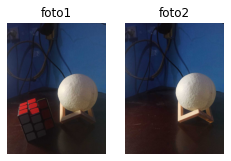

setelah gambar 1 di kurangin gambar 2 kita mendapatkan hasil gambar seperti di bawah ini


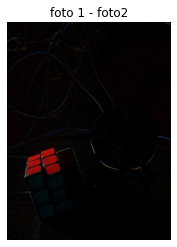

In [14]:
import cv2
z1 = io.imread(d1)
z2 = io.imread(d2)
i_subs = cv2.subtract(z1,z2)
# awal i_subs = np.subtract(i1, i2, dtype='int16') saya ubah karena bila mengunakan ini akan mucul pesan
# WARNING:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
# di karenakan kita mengubah gambar menjadi int16

plt.subplot(1,3,1);plt.imshow(z1)
plt.title('foto1'); plt.axis("off") 
plt.subplot(1,3,2);plt.imshow(z2)
plt.title('foto2'); plt.axis("off")
plt.show()
print ("setelah gambar 1 di kurangin gambar 2 kita mendapatkan hasil gambar seperti di bawah ini")
plt.subplot(1,1,1);plt.imshow(i_subs)
plt.title('foto 1 - foto2'); plt.axis("off")
plt.show()

2. Mask Processing

    a. Smoothing Filter
    
      1) Linear Filter

      - Average Filter
      - Gaussian Filter

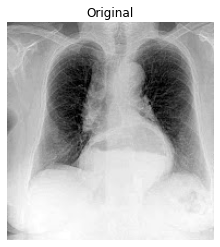

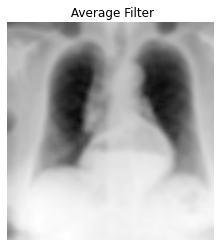

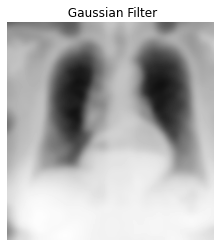

In [30]:
from skimage import filters, morphology
i1 = io.imread(b) 
gray = color.rgb2gray(io.imread(b))
fi = filters.rank.mean(gray,selem=morphology.square(6)) # awalnya 3
fi1 = util.img_as_ubyte(filters.gaussian(gray, sigma=3)) # awalnya 1
 
plt.subplot(1,1,1);plt.imshow(i1,cmap='gray',vmin=0,vmax=255)
plt.title('Original'); plt.axis("off")
plt.show()
plt.subplot(1,1,1);plt.imshow(fi,cmap='gray',vmin=0,vmax=255)
plt.title(' Average Filter'); plt.axis("off")
plt.show()
plt.subplot(1,1,1);plt.imshow(fi1,cmap='gray',vmin=0,vmax=255)
plt.title(' Gaussian Filter'); plt.axis("off")
plt.show()

2) Non Linear Filter

- Median Filter

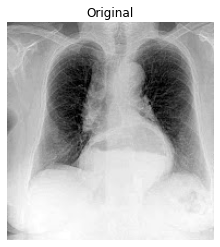

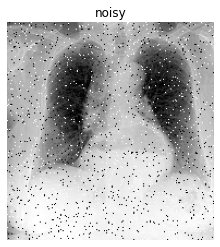

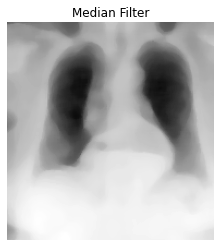

In [18]:
from skimage import filters, morphology
gray = color.rgb2gray(io.imread(b))
noise=util.img_as_ubyte(util.random_noise(gray, mode='s&p',salt_vs_pepper=0.5)) # awalnya 0.02
fi=filters.rank.median(noise,selem=morphology.square(10)) #awalnya 3
 
plt.subplot(1,1,1);plt.imshow(i1,cmap='gray',vmin=0,vmax=255)
plt.title('Original'); plt.axis("off")
plt.show()
plt.subplot(1,1,1);plt.imshow(noise,cmap='gray',vmin=0,vmax=255)
plt.title('noisy'); plt.axis("off")
plt.show()
plt.subplot(1,1,1);plt.imshow(fi,cmap='gray',vmin=0,vmax=255)
plt.title('Median Filter'); plt.axis("off")
plt.show()

- Maximum Filter

- Minimum Filter

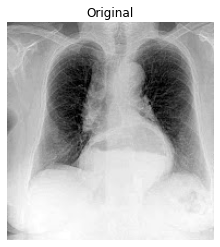

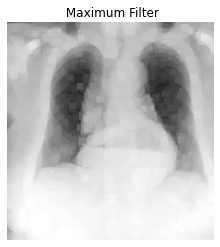

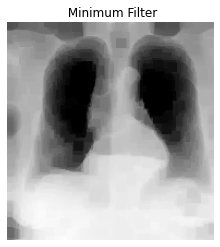

In [19]:
from skimage import filters, morphology
gray = color.rgb2gray(io.imread(b))
fi=filters.rank.maximum(gray,selem=morphology.square(6)) #awalnya 3
fi1=filters.rank.minimum(gray,selem=morphology.square(9)) #awalnya 3

 
plt.subplot(1,1,1);plt.imshow(i1,cmap='gray',vmin=0,vmax=255)
plt.title('Original'); plt.axis("off")
plt.show()
plt.subplot(1,1,1);plt.imshow(fi,cmap='gray',vmin=0,vmax=255)
plt.title(' Maximum Filter'); plt.axis("off")
plt.show()
plt.subplot(1,1,1);plt.imshow(fi1,cmap='gray',vmin=0,vmax=255)
plt.title(' Minimum Filter'); plt.axis("off")
plt.show()

b. Sharpening Filter
- Roberts, Prewitt, Sobel (edge detection)


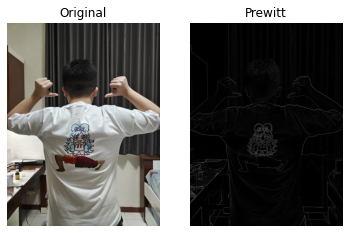

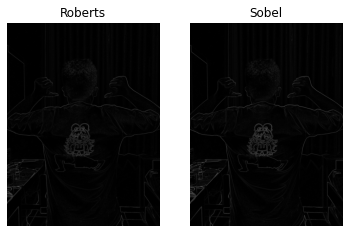

In [20]:
from skimage import filters, morphology
i1 = io.imread(a)
gray = color.rgb2gray(i1)
ed1 = util.img_as_ubyte(filters.prewitt(gray)) 
ed2 = util.img_as_ubyte(filters.roberts(gray)) 
ed3 = util.img_as_ubyte(filters.sobel(gray))


plt.subplot(1,2,1);plt.imshow(i1,cmap='gray',vmin=0,vmax=255)
plt.title('Original'); plt.axis("off")
plt.subplot(1,2,2);plt.imshow(ed1,cmap='gray',vmin=0,vmax=255)
plt.title('Prewitt'); plt.axis("off") 
plt.show()
plt.subplot(1,2,1);plt.imshow(ed2,cmap='gray',vmin=0,vmax=255)
plt.title('Roberts'); plt.axis("off")
plt.subplot(1,2,2);plt.imshow(ed3,cmap='gray',vmin=0,vmax=255)
plt.title('Sobel'); plt.axis("off") 
plt.show()

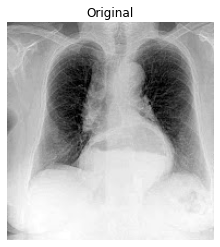

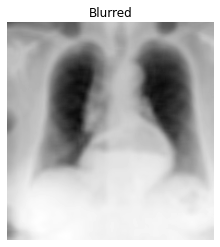

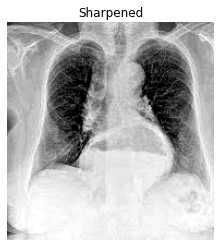

In [21]:
from skimage import filters, morphology
i1 = io.imread(b)
gray = color.rgb2gray(i1)
fi = filters.rank.mean(gray, selem=morphology.square(6)) #awalnya 3
sh = filters.unsharp_mask(i1, radius=6) #awalnya 3

plt.subplot(1,1,1);plt.imshow(i1,cmap='gray',vmin=0,vmax=255)
plt.title('Original'); plt.axis("off")
plt.show() 
plt.subplot(1,1,1);plt.imshow(fi,cmap='gray',vmin=0,vmax=255)
plt.title('Blurred'); plt.axis("off")
plt.show() 
plt.subplot(1,1,1);plt.imshow(sh,cmap='gray',vmin=0,vmax=255)
plt.title('Sharpened'); plt.axis("off") 
plt.show()

c. Color Image Processing
- Color transformation

RGB

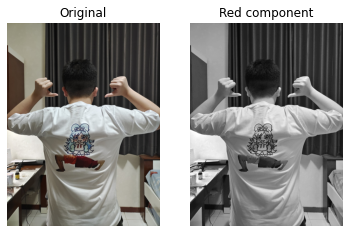

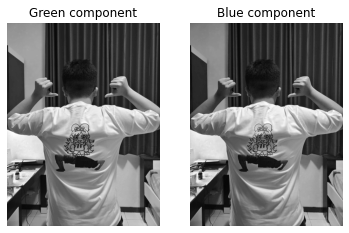

In [22]:
RGB = io.imread(a) 
R = RGB[:,:,0]
G = RGB[:,:,1]
B = RGB[:,:,2]
plt.subplot(1,2,1);plt.imshow(RGB)
plt.title('Original'); plt.axis("off") 
plt.subplot(1,2,2);plt.imshow(R,cmap='gray',vmin=0,vmax=255)
plt.title('Red component'); plt.axis("off")
plt.show() 
plt.subplot(1,2,1);plt.imshow(G,cmap='gray',vmin=0,vmax=255)
plt.title('Green component'); plt.axis("off") 
plt.subplot(1,2,2);plt.imshow(B,cmap='gray',vmin=0,vmax=255)
plt.title('Blue component'); plt.axis("off") 
plt.show()

 Histogram Processing RGB

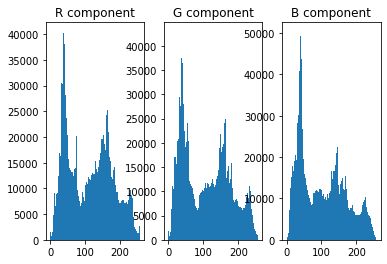

In [23]:
plt.subplot(1,3,1); plt.hist(R.flatten(), 256, range=(0,256))
plt.title('R component')
plt.subplot(1,3,2); plt.hist(G.flatten(), 256, range=(0,256))
plt.title('G component')
plt.subplot(1,3,3); plt.hist(B.flatten(), 256, range=(0,256))
plt.title('B component') 
plt.show()

CMY

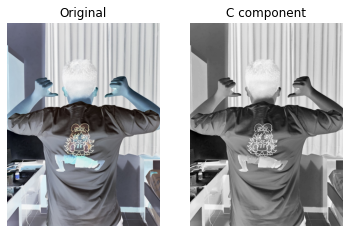

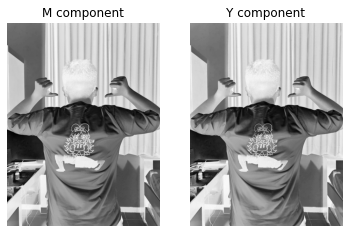

In [24]:
CMY = io.imread(a) 
C = 1 - util.img_as_float(R) 
M = 1 - util.img_as_float(G) 
Y = 1 - util.img_as_float(B) 
CMY = np.zeros(CMY.shape)
CMY[:,:,0] = C; CMY[:,:,1] = M; CMY[:,:,2] = Y
plt.subplot(1,2,1); plt.imshow(CMY)
plt.title('Original'); plt.axis("off") 
plt.subplot(1,2,2); plt.imshow(C, cmap='gray')
plt.title('C component'); plt.axis("off")
plt.show() 
plt.subplot(1,2,1); plt.imshow(M, cmap='gray')
plt.title('M component'); plt.axis("off") 
plt.subplot(1,2,2); plt.imshow(Y, cmap='gray')
plt.title('Y component'); plt.axis("off") 
plt.show()

 Histogram Processing CMY

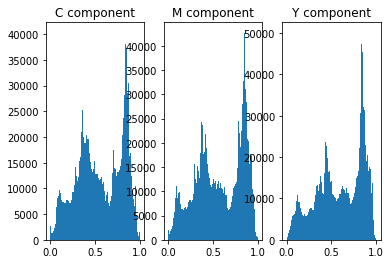

In [25]:
plt.subplot(1,3,1); plt.hist(C.flatten(), 256, range=(0,1))
plt.title('C component')
plt.subplot(1,3,2); plt.hist(M.flatten(), 256, range=(0,1))
plt.title('M component')
plt.subplot(1,3,3); plt.hist(Y.flatten(), 256, range=(0,1))
plt.title('Y component') 
plt.show()

HSV

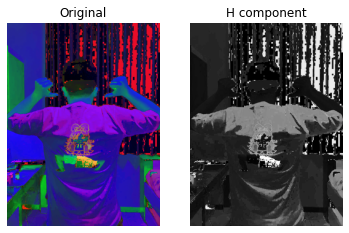

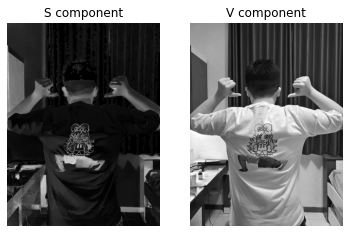

In [26]:
HSV = io.imread(a) 
HSV = color.rgb2hsv(HSV) 
H = HSV[:,:,0]
S = HSV[:,:,1]
V = HSV[:,:,2]

plt.subplot(1,2,1); plt.imshow(HSV)
plt.title('Original'); plt.axis("off") 
plt.subplot(1,2,2); plt.imshow(H, cmap='gray')
plt.title('H component'); plt.axis("off")
plt.show() 
plt.subplot(1,2,1); plt.imshow(S, cmap='gray')
plt.title('S component'); plt.axis("off") 
plt.subplot(1,2,2); plt.imshow(V, cmap='gray')
plt.title('V component'); plt.axis("off") 
plt.show()

 Histogram Processing HSV

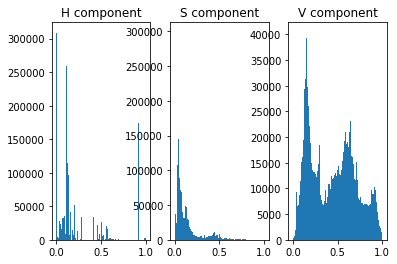

In [27]:
plt.subplot(1,3,1); plt.hist(H.flatten(), 256, range=(0,1))
plt.title('H component')
plt.subplot(1,3,2); plt.hist(S.flatten(), 256, range=(0,1))
plt.title('S component')
plt.subplot(1,3,3); plt.hist(V.flatten(), 256, range=(0,1))
plt.title('V component') 
plt.show()

- Histogram Equalization

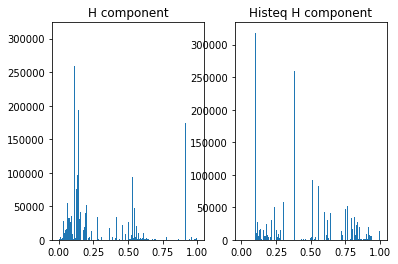

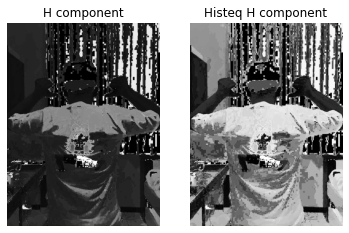

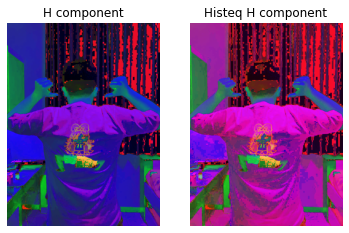

In [28]:
H_eq = exposure.equalize_hist(H)
plt.subplot(1,2,1); plt.hist(H.flatten(),256,range=(0,1))
plt.title('H component')
plt.subplot(1,2,2); plt.hist(H_eq.flatten(),256,range=(0,1))
plt.title('Histeq H component') 
plt.show()

plt.subplot(1,2,1); plt.imshow(H, cmap='gray')
plt.title('H component'); plt.axis("off") 
plt.subplot(1,2,2); plt.imshow(H_eq, cmap='gray')
plt.title('Histeq H component'); plt.axis("off")
plt.show()

HSV2 = np.zeros(HSV.shape)
HSV2[:,:,0] = H_eq; HSV2[:,:,1] = S; HSV2[:,:,2] = V
plt.subplot(1,2,1); plt.imshow(HSV)
plt.title('H component'); plt.axis("off") 
plt.subplot(1,2,2); plt.imshow(HSV2)
plt.title('Histeq H component'); plt.axis("off") 
plt.show()

- Smoothing

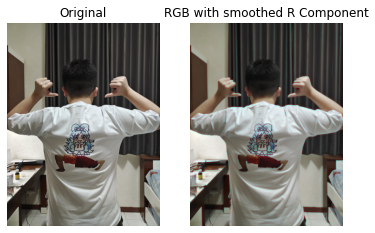

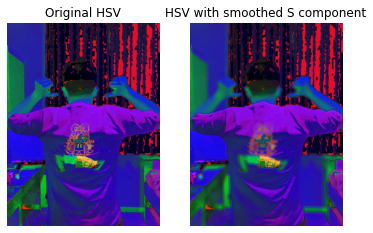

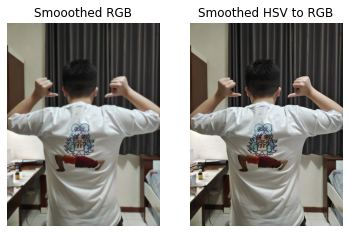

In [29]:
#Smoothing RGB With R
RGB = io.imread(a) 
R2 = filters.rank.mean(R,selem=morphology.square(24)) # awalnya 9
RGB2 = util.img_as_ubyte(np.zeros(RGB.shape)) 
RGB2[:,:,0] = R2; RGB2[:,:,1] = G; RGB2[:,:,2] = B
plt.subplot(1,2,1);plt.imshow(RGB,cmap='gray',vmin=0,vmax=255)
plt.title('Original'); plt.axis("off")  
plt.subplot(1,2,2);plt.imshow(RGB2,cmap='gray',vmin=0,vmax=255)
plt.title('RGB with smoothed R Component'); plt.axis("off")  
plt.show()

#Smoothing HSV  with S
HSV = color.rgb2hsv(RGB) 
S2=util.img_as_float(filters.rank.mean(S,selem=morphology.square(32))) #awalnya 9
HSV2 = np.zeros(HSV.shape)
HSV2[:,:,0] = H; HSV2[:,:,1] = S2; HSV2[:,:,2] = V

plt.subplot(1,2,1); plt.imshow(HSV,cmap='gray',vmin=0,vmax=255)
plt.title('Original HSV'); plt.axis("off")  
plt.subplot(1,2,2); plt.imshow(HSV2,cmap='gray',vmin=0,vmax=255)
plt.title('HSV with smoothed S component'); plt.axis("off")  
plt.show()

#Smootihing HSV to RGB
Res = color.hsv2rgb(HSV2)
plt.subplot(1,2,1); plt.imshow(RGB2,cmap='gray',vmin=0,vmax=255)
plt.title('Smooothed RGB'); plt.axis("off")  
plt.subplot(1,2,2); plt.imshow(Res,cmap='gray',vmin=0,vmax=255)
plt.title('Smoothed HSV to RGB'); plt.axis("off")  
plt.show()

Sharpening

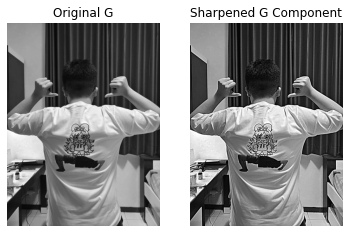

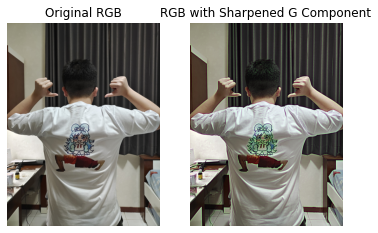

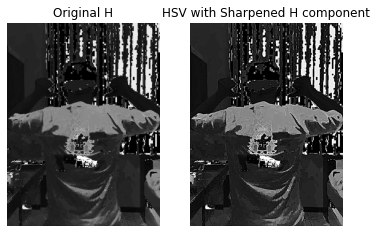

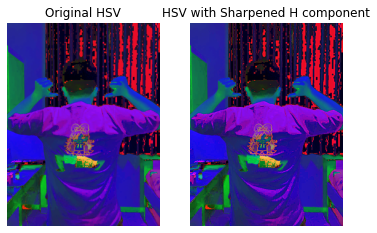

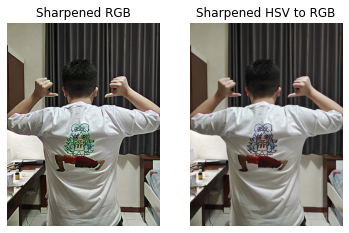

In [31]:
#Sharpening G
RGB = io.imread(a)
R = RGB[:,:,0]
G = RGB[:,:,1]
B = RGB[:,:,2] 
G2 = util.img_as_ubyte(filters.unsharp_mask(G, radius=5, amount=2))
plt.subplot(1,2,1);plt.imshow(G,cmap='gray')
plt.title('Original G'); plt.axis("off")  
plt.subplot(1,2,2);plt.imshow(G2,cmap='gray')
plt.title('Sharpened G Component'); plt.axis("off")  
plt.show()

#RGB Sharpening G component
RGB2 = util.img_as_ubyte(np.zeros(RGB.shape)) 
RGB2[:,:,0] = R; RGB2[:,:,1] = G2; RGB2[:,:,2] = B
plt.subplot(1,2,1);plt.imshow(RGB,cmap='gray')
plt.title('Original RGB'); plt.axis("off")  
plt.subplot(1,2,2);plt.imshow(RGB2,cmap='gray')
plt.title('RGB with Sharpened G Component'); plt.axis("off")  
plt.show()

#Sharpening H
HSV = color.rgb2hsv(RGB)
H = HSV[:,:,0]
S = HSV[:,:,1]
V = HSV[:,:,2] 
H2 = filters.unsharp_mask(H, radius=5, amount=2)
plt.subplot(1,2,1); plt.imshow(H,cmap='gray')
plt.title('Original H'); plt.axis("off")  
plt.subplot(1,2,2); plt.imshow(H2,cmap='gray')
plt.title('HSV with Sharpened H component'); plt.axis("off")  
plt.show()

#HSV Sharpening with H
HSV2 = np.zeros(HSV.shape)
HSV2[:,:,0] = H2; HSV2[:,:,1] = S; HSV2[:,:,2] = V
plt.subplot(1,2,1); plt.imshow(HSV,cmap='gray')
plt.title('Original HSV'); plt.axis("off")  
plt.subplot(1,2,2); plt.imshow(HSV2,cmap='gray')
plt.title('HSV with Sharpened H component'); plt.axis("off")  
plt.show()

#Sharpening HSV to RGB
Res = color.hsv2rgb(HSV2)
plt.subplot(1,2,1); plt.imshow(RGB2,cmap='gray')
plt.title('Sharpened RGB'); plt.axis("off")  
plt.subplot(1,2,2); plt.imshow(Res,cmap='gray')
plt.title('Sharpened HSV to RGB'); plt.axis("off")  
plt.show()

Studi kasus


*   Gambar 1 dan 2 memperbaikin kualitas gambar supaya terlihat objek 
*   gambar subtract 1 dan 2 lakukan pengurangan supaya  mengetahui sisa gambar 
apa yang terbentuk
*   gambar CCTV perbaikin kualitas gambar supaya mendapatkan informasi jam dan tanggal










Gambar 1

hasil dari perbaikan gambar 1 menggunakan metode  Histogram Equalization


kita mendapatkan gambar lalulintas di sebuah perkotaan

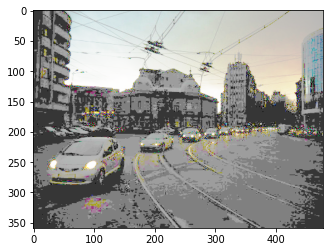

In [51]:
from skimage import exposure
gambar1 = io.imread(ge1)
f1 = exposure.equalize_hist(gambar1)
plt.imshow(f1)
plt.show()

hasil dari perbaikan gambar 2 menggunakan metode gamma transformation

kita mendapatkan gambar sebuah pasangan yang sedang melihat api unggun

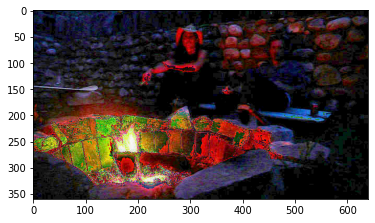

In [62]:
gambar2 = io.imread(ge2)
a = gambar2/255 
c = 6
p1 = 0.8
f1 = c*(a**p1) 

plt.subplot(1,1,1); plt.imshow((f1 *  255).astype(np.uint8))
plt.show()

gambar subtract 1 dan 2

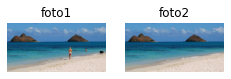

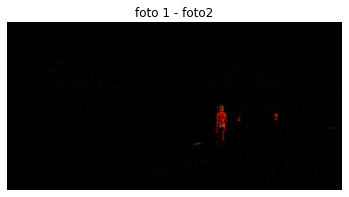

setelah gambar 1 di kurangin gambar 2 kita mendapatkan hasil gambar 
yaitu yang tersisa hanyalah gambar orang saja dan gambar pantai terhapus


In [63]:
import cv2
z1 = io.imread(pa1)
z2 = io.imread(pa2)
i_subs = cv2.subtract(z1,z2)
plt.subplot(1,3,1);plt.imshow(z1)
plt.title('foto1'); plt.axis("off") 
plt.subplot(1,3,2);plt.imshow(z2)
plt.title('foto2'); plt.axis("off")
plt.show()
plt.subplot(1,1,1);plt.imshow(i_subs)
plt.title('foto 1 - foto2'); plt.axis("off")
plt.show()
print ("setelah gambar 1 di kurangin gambar 2 kita mendapatkan hasil gambar ")
print("yaitu yang tersisa hanyalah gambar orang saja dan gambar pantai terhapus")

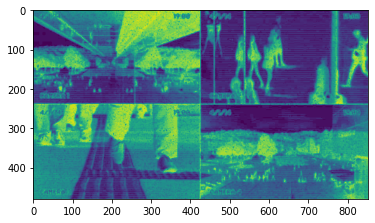

In [64]:
from skimage import filters, morphology
gray = io.imread(cv1)
noise=util.img_as_ubyte(util.random_noise(gray, mode='s&p',salt_vs_pepper= 0.2))
fi=filters.rank.median(noise,selem=morphology.square(3))
a = fi/255
c = 4
p1 = 0.8
f1 = c*(a**p1)
plt.imshow(f1) 
plt.show()

di karenakan untuk hasil dari colab kurang jelas saya menggunakan local untuk melakukan Log Transformation dan Non Linear Filter mengunakan median filter pada gambar cctv dan saya mendapatkan hasil informasi waktu yaitu tanggal 4/1/14 dan jam 19:00

berikut codingan saya di local 

In [ ]:
import cv2
from skimage import filters, morphology
import numpy as np
from skimage import io, color
from skimage import util

gray = io.imread('cv1.jpg')
# kita melakukan Non Linear Filter mengunakan median filter
noise=util.img_as_ubyte(util.random_noise(gray, mode='s&p',salt_vs_pepper=0.2))
fi=filters.rank.median(noise,selem=morphology.square(3))
# setelah melakukan Non Linear Filter mengunakan median filter pada gambar selnjutnya kita Log Transformation gambar
a = fi/255
c = 4
p1 = 0.8
f1 = c*(a**p1)

cv2.imshow('Image Window',f1)
cv2.waitKey(0)
cv2.destroyALLWindows()


beikut hasil Non Linear Filter mengunakan median filter dan log transformation yang saya lakukan di local

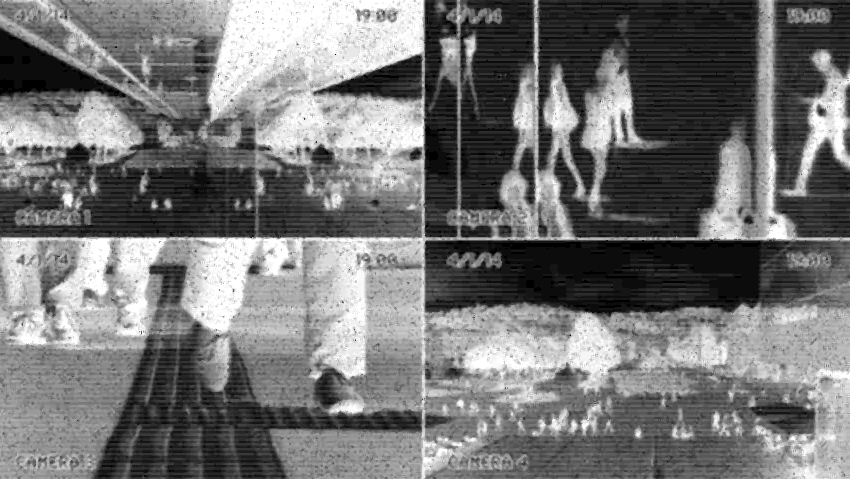

berikut ss gambar saya codingan saya di local 

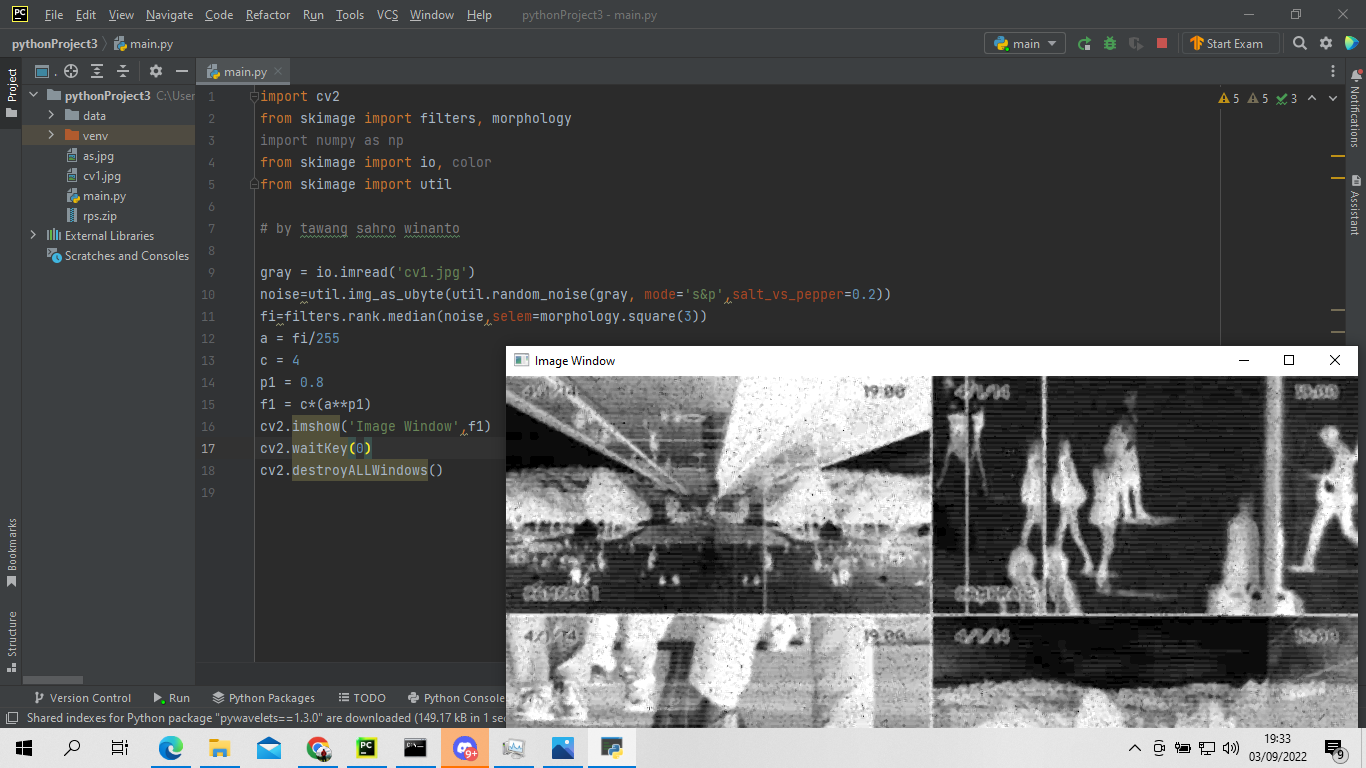